In [ ]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
train_data_dir = '/content/drive/MyDrive/archive (1)/train'
test_data_dir ='/content/drive/MyDrive/archive (1)/test'

img_size = (48, 48)
batch_size = 25


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [18]:
 #Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2039 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))


for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [20]:

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluating on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Epoch 1/30
82/82 [==============================] - 841s 10s/step - loss: 0.6657 - accuracy: 0.6317 - val_loss: 0.6583 - val_accuracy: 0.7149
Epoch 2/30
82/82 [==============================] - 33s 405ms/step - loss: 0.6631 - accuracy: 0.7116 - val_loss: 0.6468 - val_accuracy: 0.7326
Epoch 3/30
82/82 [==============================] - 30s 366ms/step - loss: 0.6396 - accuracy: 0.7327 - val_loss: 0.6373 - val_accuracy: 0.7503
Epoch 4/30
82/82 [==============================] - 34s 413ms/step - loss: 0.6046 - accuracy: 0.7563 - val_loss: 0.6578 - val_accuracy: 0.7680
Epoch 5/30
82/82 [==============================] - 31s 374ms/step - loss: 0.6099 - accuracy: 0.7440 - val_loss: 0.6546 - val_accuracy: 0.7758
Epoch 6/30
82/82 [==============================] - 31s 372ms/step - loss: 0.6905 - accuracy: 0.7631 - val_loss: 0.6712 - val_accuracy: 0.7385
Epoch 7/30
82/82 [==============================] - 30s 359ms/step - loss: 0.6748 - accuracy: 0.7685 - val_loss: 0.6611 - val_accuracy: 0.7444


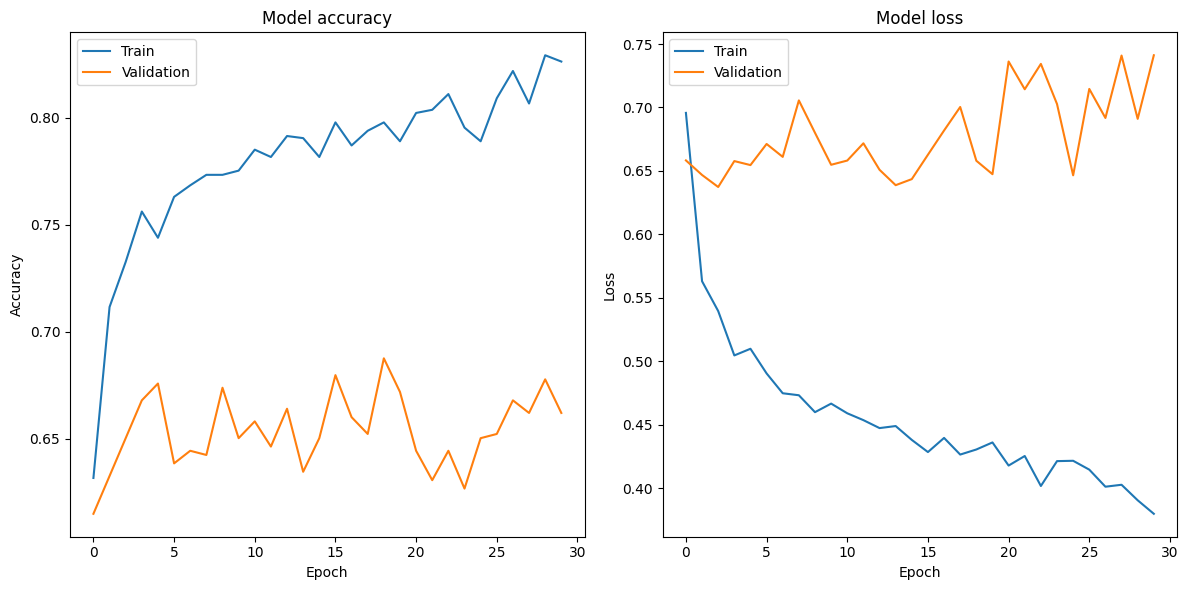

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path
image_path = '/content/drive/MyDrive/archive (1)/test/autistic/002.jpg'

img = image.load_img(image_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

predictions = model.predict(img_array)
#outcome
emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Print the predicted emotion
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 8s 8s/step
The predicted emotion is: Delight


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculating classification report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')

13/13 [==============================] - 6s 456ms/step - loss: 0.7130 - accuracy: 0.8792
Test accuracy: 0.8792207598686218
13/13 [==============================] - 6s 237ms/step
Accuracy: 0.712987012987013
Classification Report:
              precision    recall  f1-score   support

    autistic       0.80      0.79      0.79       150
non_autistic       0.82      0.84      0.83       158

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.81      0.81      0.81       308

Confusion Matrix:
[[73 77]
 [73 85]]
F1 Score: 0.8127402158652159
